# Project: Investigate Dataset of Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#sources">Sources</a></li>

</ul>

<a id='intro'></a>
## Introduction

I chose a dataset of Mediacal Appointments in Brazil for my final project. The datset describes 13 different features and one column for the outcome, if the patient showed oneself at the appointment or not (No-show = yes/no). The features include the appointment dates, IDs for patient and appointment and different attributes of the patient, f.e. if he or she has got certain diseases or not. Regarding this dateset it will be  interesting to investigate, which characteristics have an influence on whether someone has appeared at his/her appointment or not. In a first step I will analyze the influence of gender on the fact that somebody will show up or not with help of a 'present rate' (patients who were present at the appointment divided by all patients). After that I will apply a similar technique to examine the connection between age and the 'present rate'. In a last step I will also check, if the 'present rate' is dependent on the location of the hospital the appointment will take place at.


> For my analysis I will use the packages "numpy", "pandas" and "matplotlib". The last line of the following cell makes sure that the plots in "matplotlib" will be shown in this Jupyter Notebook.

In [23]:
# import of needed packages pandas and numpy for numerical calculation and analyzing with dataframes, matplotlib for vizualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

> The first step of my analysis is the import of the dataset which we are going to look at in the next steps. After importing the CSV with help of pandas pd.read_csv() method, .head() (or .tail()) assures that the importing process was successful. Furthermore it gives me a first glance of how the dataset looks like.

In [24]:
# import of the datatset 
df = pd.read_csv("appointments_brazil.csv")

# show the first 10 lines and the last 10 lines of the datset
df.head(10)
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


> The next step is to explore the datatypes in the given dataset with use of .info(). I was happy with all of the variables datatypes except the variables which contain dates (ScheduledDay & AppointmentDay). It is always easier to deal with dates, which are in a datetime format and not a simple string, in order to apply pandas date functions in the further analysis.

In [25]:
# get information about the datsets datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> .shape gives you the number of observations and variables of the datset.

In [26]:
# get information about the dataframe's shape
df.shape

(110527, 14)

> Another step of data exploration was to check if the dataset contains any NAs. I did so with the .isna() function and built a sum over every column. The sum was 0 for each column, which proves that the dataset does not include any NAs.

In [27]:
# check if there are NA's in the dataset
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [28]:
# Generate descriptive statistics for the given datasframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The function above (.describe()) shows different descriptive statistics for every of the features. It does not make that much sense to interpret the statistics for dummy coded variables. In contrast, very conspicious is the min of age which is negative (-1) and obviously not possible. Hence I removed lines with a negative age from the dataset in the next section's beginning.

### Data Cleaning 

In [29]:
# filter dataframe by only realistic ages (> 0)
df = df[df["Age"] >= 0]

> As a second step of this section I changed the coding of the dependent variable. Originally the variable was designated as "No-show", which means that the characteristic "No" would imply that the considered person shows up at his/her appointment. In my optinion that leads to confusions, hence I changed the variable name to "present" and assigned "1" if somebody showed up and "0" if he/she did not. After that, I changed the datatype to integer.

In [30]:
# replace 'Yes' with '0' in the 'No-show' column
df['No-show'] = df['No-show'].replace('Yes', '0')

# replace 'No' with '1' in the 'No-show' column
df['No-show'] = df['No-show'].replace('No', '1')

# rename 'No-show' column with 'present'
df = df.rename(columns={'No-show': 'present'})

# change datatype string to int 
df['present'] = df['present'].astype('int64')



In [31]:
# check if everything worked by displaying the first rows and datatypes
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  present         110526 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 12.6+ MB


> Since I am going to explore the influences of different features on the fact that somebody will show up on his/her appointment, it makes sense, to create a filter that splits the data in patients who were present and the ones that were not.

In [32]:
# assign new variables 'present' and 'not_present'
present = df.present == True
not_present = df.present == False

> As I already mentioned before, it is easier to work with dates which are in a datetime format instead of a string type. Therefore I applied pandas .to_datetime() function to change the datatype.

In [33]:
# change datatype from string to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

> Additionally, I removed cells which I will certainly not use in my forthcoming analysis with help of .drop().

In [34]:
# remove not needed features
df.drop(["PatientId", "AppointmentID", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"], axis = 1,  inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


### Does Gender affect if somebody showes up to the appointment or not?

> The first question I will ask in my analysis is, if the gender of a certain patient influences the chance that somebody will be present at the scheduled appointment. Therefore I count the present/not present divided by male/female patients in a table with use of value.counts(). With these results I created a plot containing two bars for present/not present each splitted by male/female. 

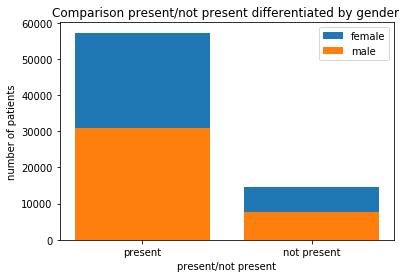

In [35]:
# filter data by male patients and count present/ not present patients
male_c = df[df.Gender == "M"].present.value_counts()

# filter data by female patients and count present/ not present patients
female_c = df[df.Gender == "F"].present.value_counts()

# create bar plot 
plt.bar(["present", "not present"], female_c, label = "female")
plt.bar(["present", "not present"], male_c, label = "male")
plt.title("Comparison present/not present differentiated by gender ")
plt.xlabel("present/not present")
plt.ylabel("number of patients")
plt.legend();

> The plot itself does not show any significant differences between male and female patients, because both proportions of orange an blue are approximately the same in both bars. To prove that finding, I calculated the proportions of patients in every gender category who did not appear, in relation to all of the patients of its category. The result was 0.8000 for male patients, in comparison to a 'present rate' of 0.7968 for the female patients.
That is just a very small difference, which can not lead to any significant statements regarding differences between males and females.

In [36]:
# calculate present rate for male patients 
prop_m = male_c[1] / (male_c[1] + male_c[0])
prop_m 

0.8003205211052808

In [37]:
# calculate present rate for female patients 
prop_f = female_c[1] / (female_c[1] + female_c[0])
prop_f

0.7968512924734475

### Does the age of a patient influence the fact that he/she will be present at the appointment?

The next question I investigate is, if the age influences the patient to show up at his/her appointment or not. Hence, I created a plot containing a histogram of all ages for the whole dataset (blue) and a histogram for all ages and only the patients who were not present at their scheduled appointment (orange).


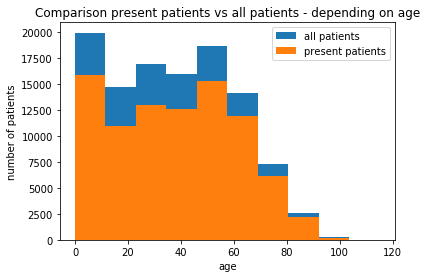

In [38]:
# plot a histogram for patients - divided by age
plt.hist(df.Age, label = "all patients")

# plot a histogram for present patients - divided by age
plt.hist(df[present].Age, label = "present patients")
plt.title("Comparison present patients vs all patients - depending on age")
plt.xlabel("age")
plt.ylabel("number of patients")
plt.legend();

> It is very hard, to figure out, if there is a relation between the age of a patient and if he/she will be present or not by only looking at this chart. Maybe you can eastimate lower 'present rates' in the age around 20 by the lighter incision in the blue histogram in comparison to the deeper cut of the orange one in that age. In order to study the problem more thoroughly I grouped the patients ages in steps of 10 years and again calculated 'present rates' in every of that groups. These 'present rates' are plotted in the line chart below. Here you can see comparatively large differences in 'present rates' between patiences in the age group 10-20 years (0.7475) and the rate for patients who are between 60 and 70 years old (0.8446). Although this seems like a rather large difference, we can not give any statistical significance for the examined link.

0-10      0.792965
10-20     0.747462
20-30     0.753755
30-40     0.785278
40-50     0.800971
50-60     0.826256
60-70     0.852712
70-80     0.844608
80-90     0.840016
90-100    0.803987
 >100     0.571429
Name: Age_categ, dtype: float64

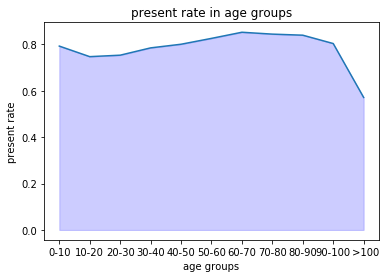

In [39]:
# build 11 age groups in the data

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100", " >100"]

df["Age_categ"] = pd.cut(df["Age"], bins = bins, labels = labels)

age_c = df["Age_categ"].value_counts(sort = False)

# count present patients in every age group and divide those by count of all patients of a age group (present rate)
pr_c = df.Age_categ[present].value_counts(sort = False) 
age_proportions = pr_c / age_c

# plot present rate 
fig1 = plt.plot(age_proportions)

plt.xlabel('age groups')
plt.ylabel('present rate')
plt.title('present rate in age groups')
plt.rcParams['figure.figsize'] = (8,5)
plt.fill_between(age_proportions.index, age_proportions,
                 color='blue',       
                 alpha=0.2) ;         


age_proportions




### Does the hospital's location influence the fact that the patient will be present at the appointment?

> The last object of investigation is, if there is a relation between the fact that somebody will show up at the appointment and the hospital's location. Therefore I looked at 10 of the hospitals to figure out any trends. I again applied the .value_counts() function to all patients in comparison to all patients who were present and filtered by the first 10 hospitals of the table.
After that I created a bar chart to compare the two different counts for the 10 hospitals. Again it is not so easy to figure out if there are any differences in 'present rates'. Hence, I added the rounded 'present rates' to the x-axis labeling, to come across possible differences. The biggest difference in 'present rate' is given by CONSOLAÇÃ (0.83) and HORTO (0.76). That seems again like a quite high difference of around 6% points, which can not be significantly proven without any statistical tests.   

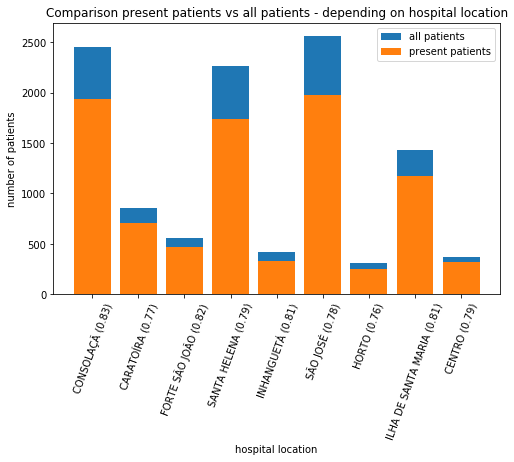

In [40]:
# count present and not present patients divided by hospital location and select only the first 10
present_c = df[present].Neighbourhood.value_counts(sort = False)[1:10]
not_present_c = df[not_present].Neighbourhood.value_counts(sort = False)[1:10]

# count all patients divided by hospital location ansd select only the first 10
all_neighb_c = df.Neighbourhood.value_counts(sort = False)[1:10]

# plot counts of all patients
plt.bar(["CONSOLAÇÃ (0.83)",
"CARATOÍRA (0.77)",
"FORTE SÃO JOÃO (0.82)",
"SANTA HELENA (0.79)",
"INHANGUETÁ (0.81)",
"SÃO JOSÉ (0.78)",
"HORTO (0.76)",
"ILHA DE SANTA MARIA (0.81)",
"CENTRO (0.79)"], all_neighb_c, label = "all patients")
# plot counts of present patients
plt.bar(["CONSOLAÇÃ (0.83)",
"CARATOÍRA (0.77)",
"FORTE SÃO JOÃO (0.82)",
"SANTA HELENA (0.79)",
"INHANGUETÁ (0.81)",
"SÃO JOSÉ (0.78)",
"HORTO (0.76)",
"ILHA DE SANTA MARIA (0.81)",
"CENTRO (0.79)"], present_c, label = "present patients")
plt.xlabel('hospital location')
plt.ylabel('number of patients')
plt.title('Comparison present patients vs all patients - depending on hospital location')
plt.legend()
plt.xticks(rotation=70)

# calculate present rate for every hospital location
prop = present_c / all_neighb_c

<a id='conclusions'></a>
## Conclusion

The present analysis examined different influences on the dependent variable (referred to here as "present".). While there is hardly any difference in the "present rate" between men and women, there are differences between age groups and hospital locations. Whether these can be classified as statistically significant can only be answered by static tests, which were left out in the above analysis. Rather, the study can be seen as preparatory work for the programming of a classifier f.e. by means of a logistic regression. 

<a id='sources'></a>
## Sources

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.hist.html
https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html
https://nextjournal.com/schmudde/how-to-remove-outliers-in-data
https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
https://python-graph-gallery.com/barplot/
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
https://matplotlib.org/tutorials/introductory/customizing.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
https://www.w3schools.com/python/ref_string_replace.asp















